In [1]:
import ccxt
import time
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np

In [2]:
binance = ccxt.binance()

In [3]:
btc_ticker = binance.fetch_ticker('BTC/USDT')
btc_ticker

{'symbol': 'BTC/USDT',
 'timestamp': 1678445808388,
 'datetime': '2023-03-10T10:56:48.388Z',
 'high': 21834.99,
 'low': 19549.09,
 'bid': 19640.68,
 'bidVolume': 0.03488,
 'ask': 19642.17,
 'askVolume': 0.04401,
 'vwap': 20565.23690133,
 'open': 21679.5,
 'close': 19642.17,
 'last': 19642.17,
 'previousClose': 21679.99,
 'change': -2037.33,
 'percentage': -9.398,
 'average': 20660.835,
 'baseVolume': 604331.20484,
 'quoteVolume': 12428214394.403744,
 'info': {'symbol': 'BTCUSDT',
  'priceChange': '-2037.33000000',
  'priceChangePercent': '-9.398',
  'weightedAvgPrice': '20565.23690133',
  'prevClosePrice': '21679.99000000',
  'lastPrice': '19642.17000000',
  'lastQty': '0.02599000',
  'bidPrice': '19640.68000000',
  'bidQty': '0.03488000',
  'askPrice': '19642.17000000',
  'askQty': '0.04401000',
  'openPrice': '21679.50000000',
  'highPrice': '21834.99000000',
  'lowPrice': '19549.09000000',
  'volume': '604331.20484000',
  'quoteVolume': '12428214394.40374460',
  'openTime': '1678359

In [4]:
coin = 'BTC/USDT'
btc_usdt_ohlcv = binance.fetch_ohlcv(coin,'5m',limit=100)
df=pd.DataFrame(btc_usdt_ohlcv,columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
df.index = pd.to_datetime(df['Date'], unit = 'ms' )
df.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2023-03-10 02:40:00,1678416000000,20092.06,20093.96,20062.56,20069.91,877.62068
2023-03-10 02:45:00,1678416300000,20070.71,20092.44,20068.18,20073.26,1005.01668
2023-03-10 02:50:00,1678416600000,20072.70,20073.30,20048.00,20058.47,913.88090
2023-03-10 02:55:00,1678416900000,20058.93,20061.72,20024.95,20040.44,941.08432
2023-03-10 03:00:00,1678417200000,20040.44,20051.12,20010.00,20015.25,1030.53379


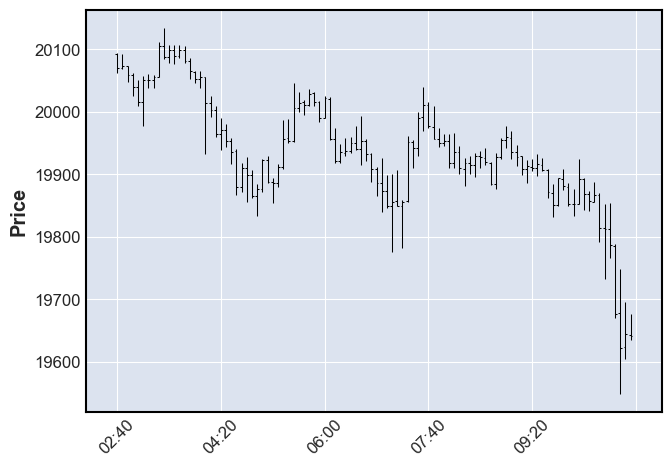

In [5]:
mpf.plot(df)

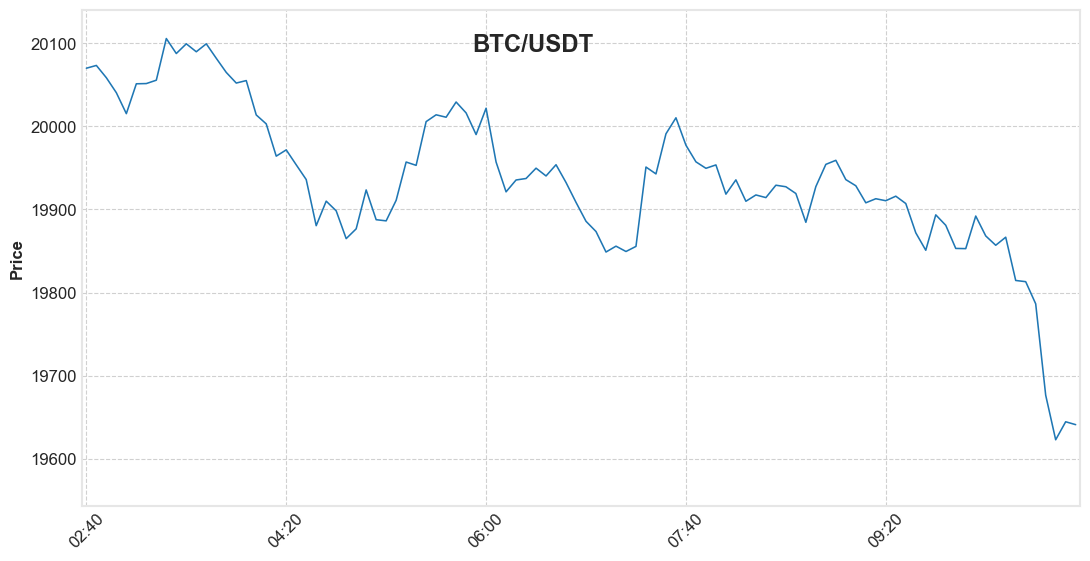

In [6]:
mpf.plot(df, type = 'line', volume = False, style = 'binance', title = coin, tight_layout = True, figratio = (10,5), figscale = 1)

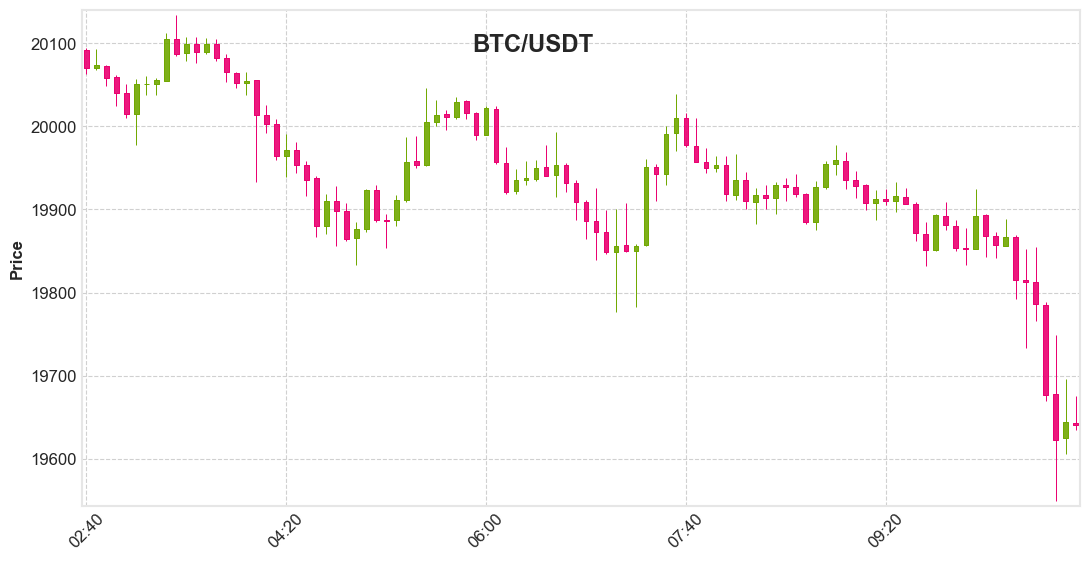

In [7]:
mpf.plot(df, type = 'candle', volume = False, style = 'binance', title = coin, tight_layout = True, figratio = (10,5), figscale = 1)

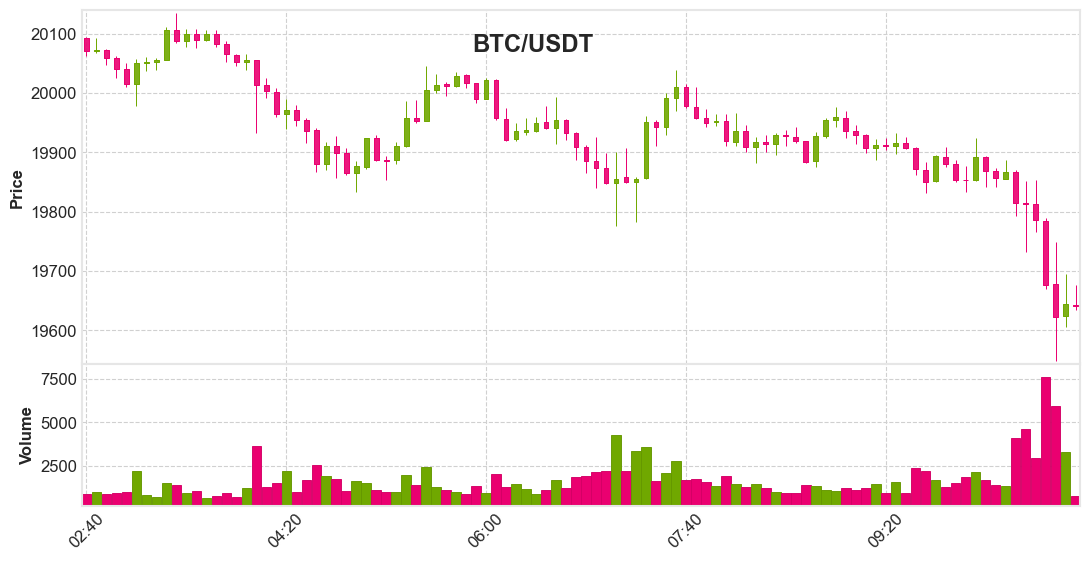

In [8]:
mpf.plot(df, type = 'candle', volume = True, style = 'binance', title = coin, tight_layout = True, figratio = (10,5), figscale = 1)

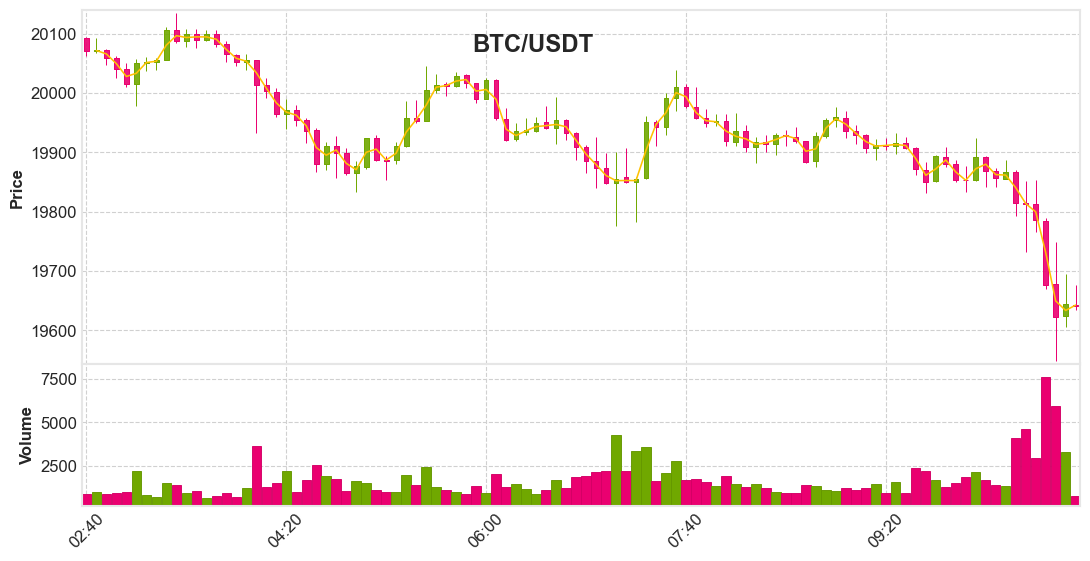

In [9]:
mpf.plot(df, type = 'candle',mav = 2, volume = True, style = 'binance', title = coin, tight_layout = True, figratio = (10,5), figscale = 1)

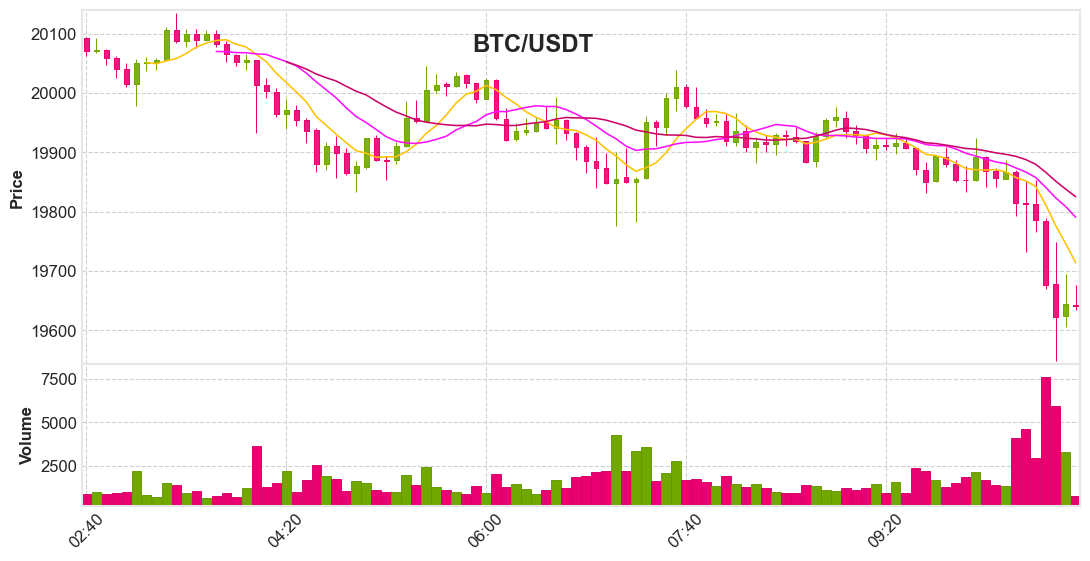

In [10]:
mpf.plot(df, type = 'candle',mav = (7,14,21), volume = True, style = 'binance', title = coin, show_nontrading = False,
        tight_layout = True, figratio = (10,5), figscale = 1)

In [11]:
# mpf.plot(df, type = 'candle',mav = (7,14,21), volume = True, style = 'binance', title = coin, show_nontrading = False,
#         tight_layout = True, figratio = (10,5), figscale = 1, savefig ='ccxt.png')

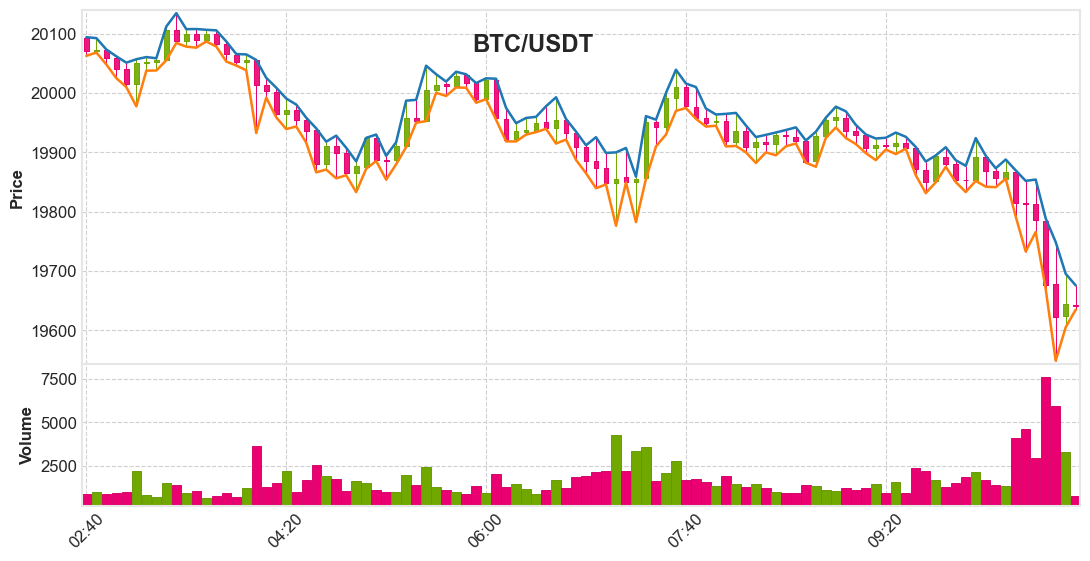

In [12]:
ap0 = [
    mpf.make_addplot(df["High"]), 
    mpf.make_addplot(df["Low"]) 
]
mpf.plot(df,type='candle',volume = True,addplot=ap0,title=coin,style = 'binance',tight_layout = True, figratio = (10,5), figscale = 1)

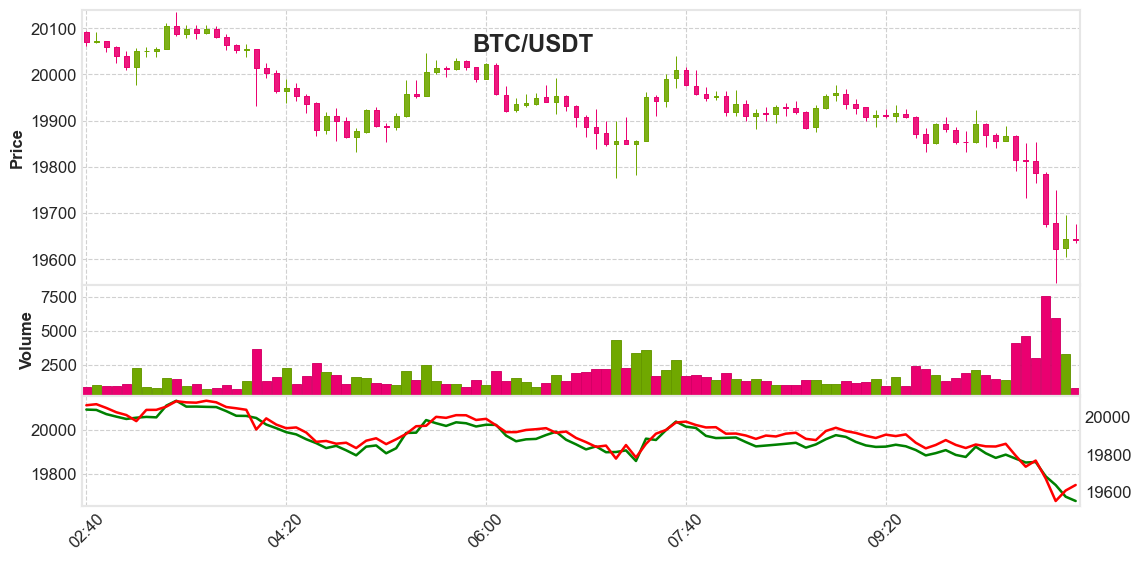

In [13]:
# 3 panels
ap2 = [
    mpf.make_addplot(df["High"], color = 'g', panel=2), # Panel 2 is specified
    mpf.make_addplot(df["Low"], color = 'r', panel=2)
]
mpf.plot(df,type='candle',volume = True,addplot=ap2,title=coin,style = 'binance',tight_layout = True, figratio = (10,5), figscale = 1)

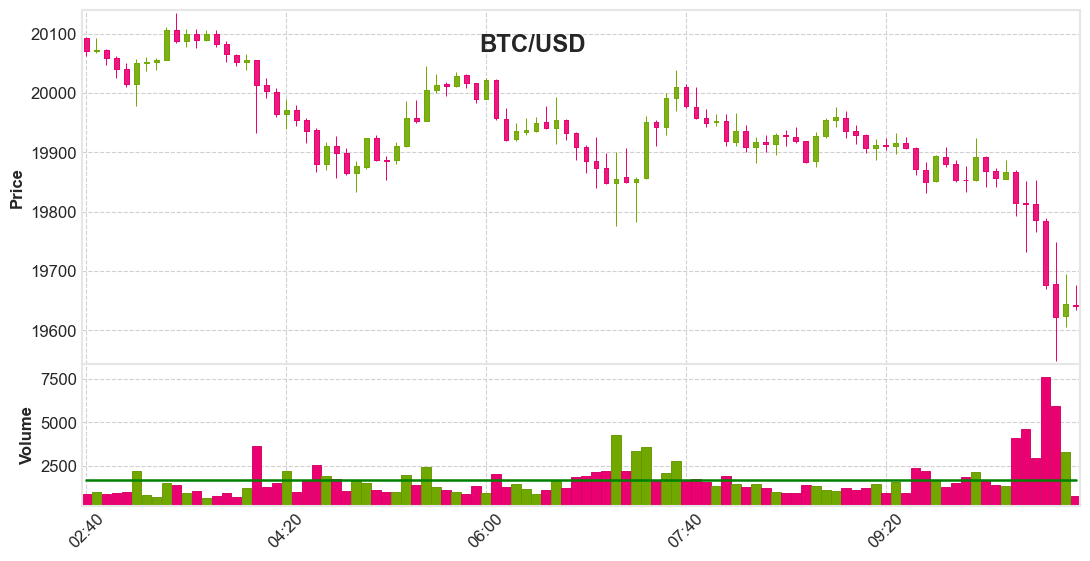

In [14]:
volume_mean = df["Volume"].mean()

# Create addplot object with the mean value
ap3 = [mpf.make_addplot([volume_mean]*len(df), color="g", panel=1)]

# Plot candlestick chart with volume and addplot
mpf.plot(df, type="candle", volume=True, addplot=ap3, title="BTC/USD",
         style="binance", tight_layout=True, figratio=(10,5), figscale=1)

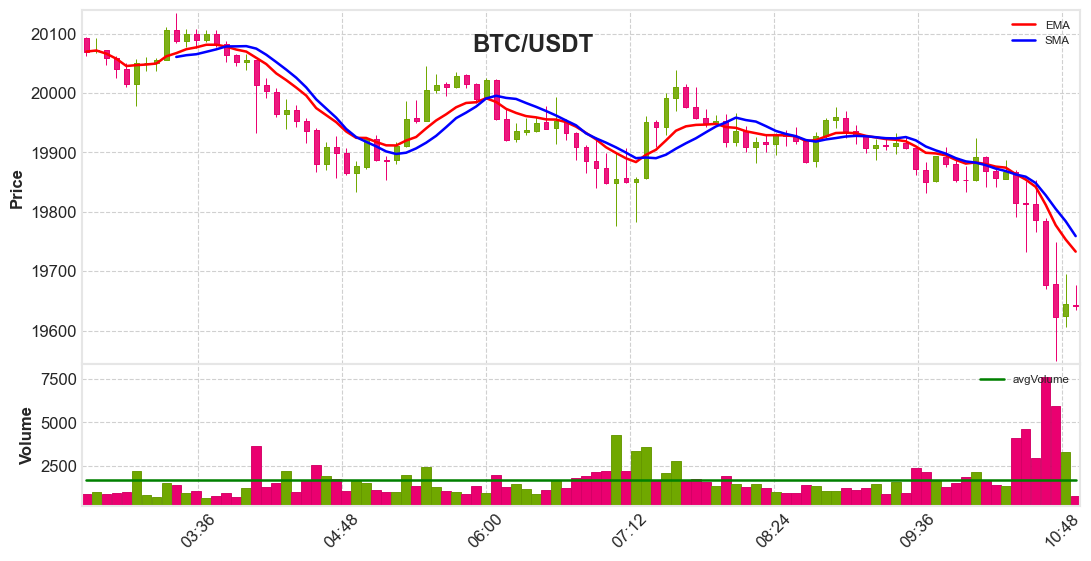

In [15]:
# Create a 10-day exponential moving average, simple moving avg, and mean volume
volume_mean = df["Volume"].mean()
ema = df['Close'].ewm(span=10).mean()
smva= df['Close'].rolling(10).mean()
smva_line=mpf.make_addplot(smva, color='b')
expline=mpf.make_addplot(ema, color='red')
vol_line=mpf.make_addplot([volume_mean]*len(df), color="g", panel=1)
ap4=[expline,vol_line,smva_line]
# Plot the data with candlesticks and the EMA as an overlay including avg volume
fig, axes = mpf.plot(df, type = 'candle', style='binance', addplot=ap4,  volume = True,  title = coin, show_nontrading =True,
        tight_layout = True, figratio = (10,5), figscale = 1, returnfig=True)
axes[0].legend([None]*(len(ap4)+2))
handles, labels = axes[0].get_legend().get_lines(), [line.get_label() for line in axes[0].get_legend().get_lines()]
axes[0].legend(fontsize = 'x-small',loc = 'upper right',handles=handles[1:],labels=['EMA', 'SMA'])
axes[2].legend(fontsize = 'x-small',loc = 'upper right',labels = ['avgVolume'])
plt.show()